In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total spend'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [6]:
df.corr()

,TV,radio,newspaper,sales,total spend
TV,1.000000,0.054809,0.056648,0.782224,0.945330
radio,0.054809,1.000000,0.354104,0.576223,0.293211
newspaper,0.056648,0.354104,1.000000,0.228299,0.343059
sales,0.782224,0.576223,0.228299,1.000000,0.867712
total spend,0.945330,0.293211,0.343059,0.867712,1.000000


<AxesSubplot:xlabel='total spend', ylabel='sales'>

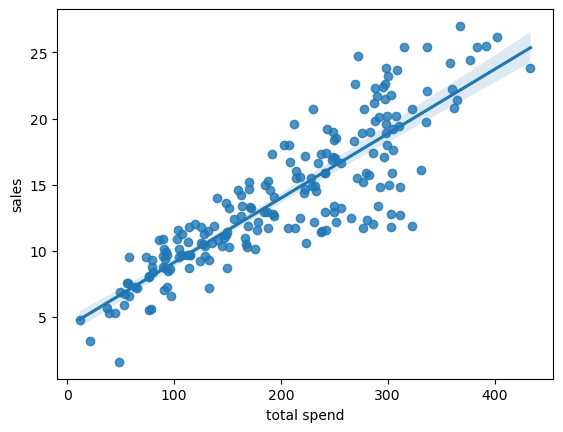

In [8]:
sns.regplot(data=df, x='total spend', y='sales')

In [9]:
X = df['total spend']
y = df['sales']

In [10]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [11]:
# y=mx+b
# y=B1x + B0
#polyfit grado 1 mi dà B1 e B0 IN QUESTO ORDINE
# y è circa 0.0487x + 4.2430

np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [12]:
potential_spend = np.linspace(0,500,100)

In [13]:
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [14]:
predicted_sales= 0.04868788*potential_spend + 4.24302822

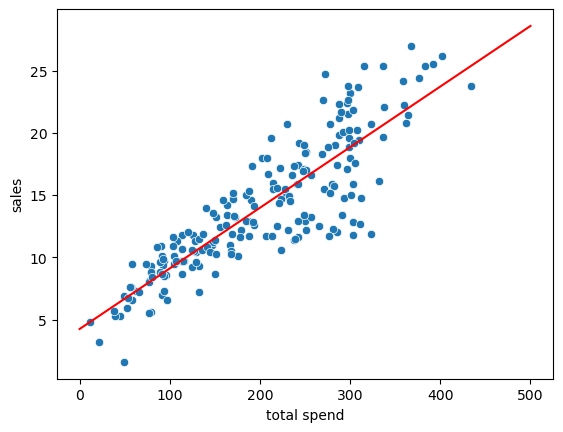

In [17]:
sns.scatterplot(x='total spend', y='sales', data=df)
plt.plot(potential_spend, predicted_sales, color='red')

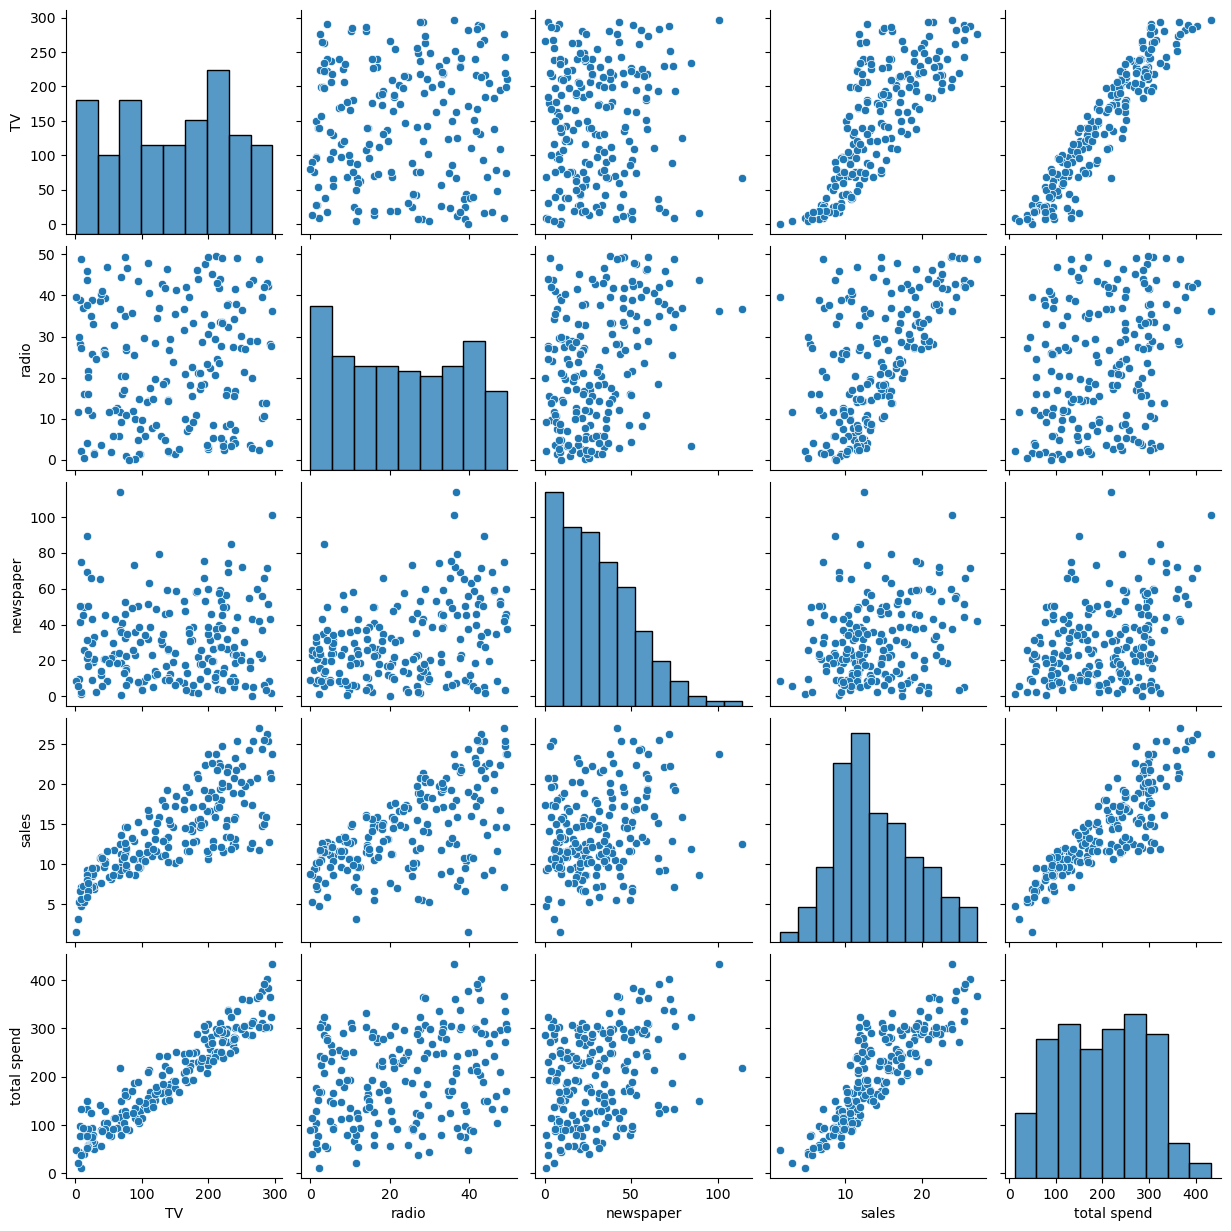

In [18]:
sns.pairplot(data=df)

In [87]:
X = df.drop(['total spend', 'sales'], axis=1)


In [88]:
y=df['sales']

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [91]:
len(df)

200

In [92]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [93]:
len(X_test)

60

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
model = LinearRegression()

In [96]:
model.fit(X_train, y_train)

LinearRegression()

In [97]:
test_predictions = model.predict(X_test)

In [98]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [100]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

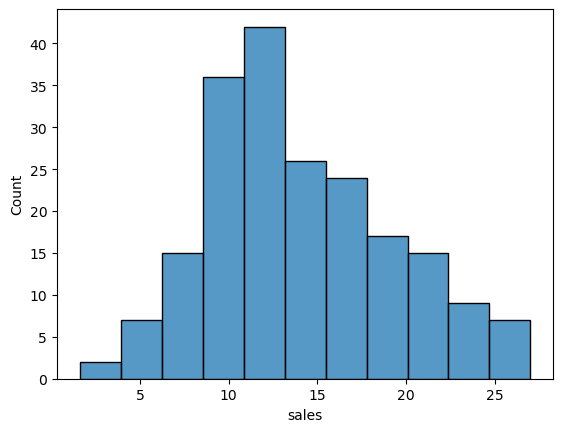

In [101]:
sns.histplot(data = df, x='sales')

In [102]:
mean_absolute_error(y_test,test_predictions)

1.213745773614481

In [103]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.516151937599388

In [104]:
test_residuals = y_test-test_predictions
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

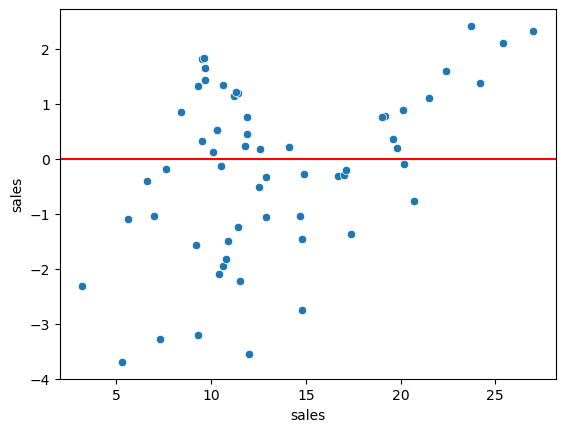

In [105]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='-')

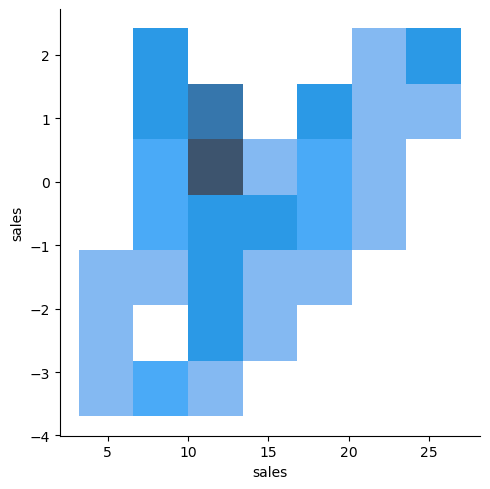

In [106]:
sns.displot(x=y_test, y=test_residuals)

In [107]:
import scipy as sp

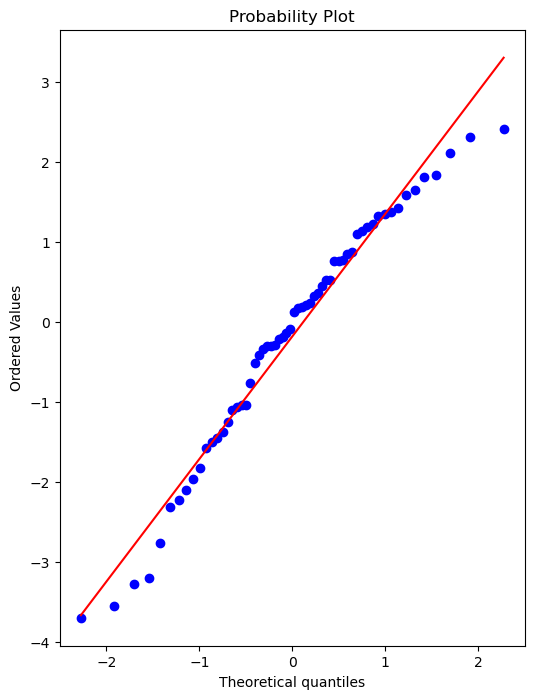

In [108]:
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)

In [109]:
final_model = LinearRegression()

In [110]:
final_model.fit(X,y)

LinearRegression()

In [111]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [112]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [113]:
y_hat = final_model.predict(X)

In [114]:
from joblib import dump,load

In [115]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [116]:
loaded_model = load('final_sales_model.joblib')

In [117]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [118]:
X.shape

(200, 3)

In [119]:
#ex 149 TV, 22 radio, 12 newspaper
# sales?
campaign = [[149,22,12]]

In [121]:
loaded_model.predict(campaign)

C:\Users\00006258\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])